In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import tools.clusterfit as cf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # shut up, seaborn
plt.style.use('./nice.mplstyle')
scan_bf = pd.read_csv('./data/fits/scan_best_fit_M-T_θ75.csv')
scan_bf

,Glon,Glat,A,B,TotalScatter,n_sigma
0,-180.0,-90.0,1.060432,1.988,0.050,0.000000
1,-180.0,-88.0,1.060432,1.988,0.050,-1.112879
2,-180.0,-86.0,1.060432,1.985,0.050,-1.302966
3,-180.0,-84.0,1.060432,1.985,0.050,-1.112879
4,-180.0,-82.0,1.053132,1.982,0.050,-1.118868
...,...,...,...,...,...,...
8095,176.0,80.0,1.090142,2.018,0.055,1.232147
8096,176.0,82.0,1.090142,2.018,0.055,1.124997
8097,176.0,84.0,1.090142,2.015,0.055,1.178258
8098,176.0,86.0,1.082637,2.009,0.055,1.286273


In [2]:
scan_bf['n_sigma'].idxmax(), scan_bf['n_sigma'].idxmin()

(2032, 6068)

In [27]:
cf.angular_separation(-92,14,-64,22)

27.753062981922632

In [3]:
scan_bf.iloc[2032], scan_bf.iloc[6068]

(Glon           -92.000000
 Glat            14.000000
 A                1.120683
 B                2.090000
 TotalScatter     0.040000
 n_sigma          3.919653
 Name: 2032, dtype: float64,
 Glon            88.000000
 Glat           -14.000000
 A                1.038683
 B                1.952000
 TotalScatter     0.035000
 n_sigma         -3.919653
 Name: 6068, dtype: float64)

In [4]:
samples = pd.read_csv('./data/samples-lightcone0-clean.csv')
dtheta = cf.angular_separation(samples['phi_on_lc'], samples['theta_on_lc'], -75, 14)

In [5]:
p_dipoles = samples[:300][dtheta[:300] < 75]
n_dipoles = samples[:300][dtheta[:300] > 105]

# 1 Check histogram of some properties
T, z, fraction, flux

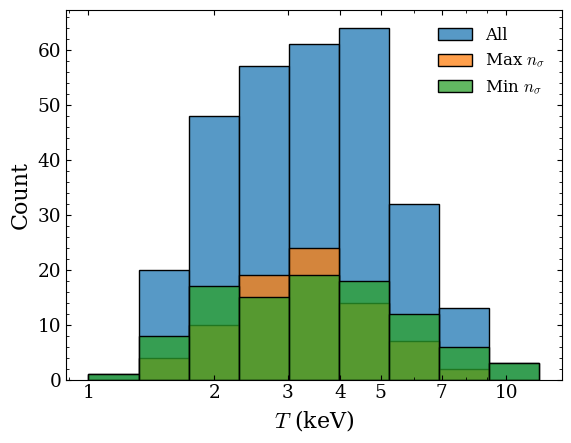

In [11]:
bins = np.linspace(np.log10(1), np.log10(12), 10)
sns.histplot(samples[cf.COLUMNS['T']][:300], bins=bins, label='All', log_scale=True)
sns.histplot(p_dipoles[cf.COLUMNS['T']], bins=bins, label='Max $n_\\sigma$', log_scale=True)
sns.histplot(n_dipoles[cf.COLUMNS['T']], bins=bins, label='Min $n_\\sigma$', log_scale=True)
plt.xlabel('$T$ (keV)')
plt.xticks(ticks=[1, 2, 3, 4, 5, 7, 10],
    labels=['1','2','3','4','5','7','10'])
plt.legend()
plt.show()

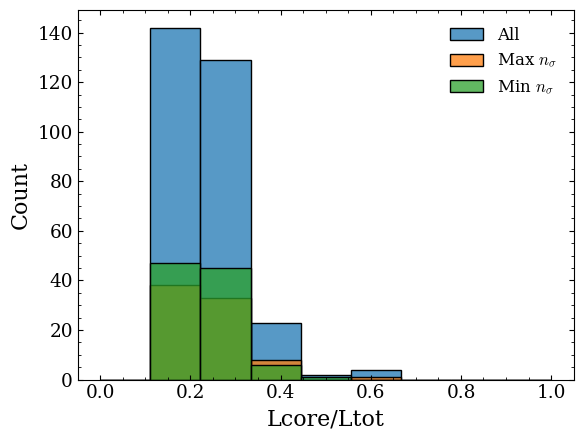

In [10]:
bins = np.linspace(0, 1, 10)
sns.histplot(samples['Lcore/Ltot'][:300], bins=bins, label='All')
sns.histplot(p_dipoles['Lcore/Ltot'], bins=bins, label='Max $n_\\sigma$')
sns.histplot(n_dipoles['Lcore/Ltot'], bins=bins, label='Min $n_\\sigma$')
plt.legend()
plt.show()

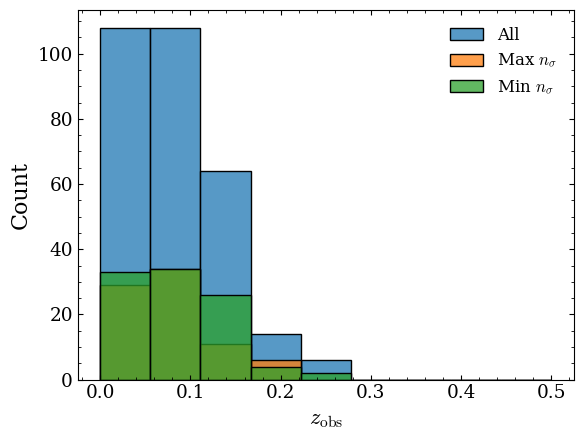

In [12]:
bins = np.linspace(0, 0.5, 10)
sns.histplot(samples['ObservedRedshift'][:300], bins=bins, label='All')
sns.histplot(p_dipoles['ObservedRedshift'], bins=bins, label='Max $n_\\sigma$')
sns.histplot(n_dipoles['ObservedRedshift'], bins=bins, label='Min $n_\\sigma$')
plt.xlabel('$z_\\mathrm{{obs}}$')
plt.legend()
plt.show()

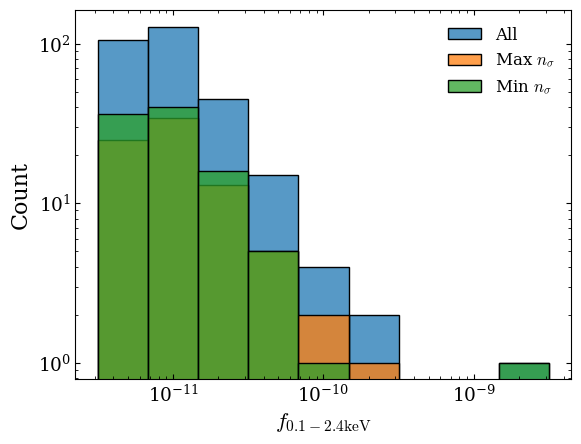

In [13]:
bins = np.linspace(-11.5, -8.5, 10)
sns.histplot(samples['Flux'][:300], bins=bins, label='All', log_scale=[True, True])
sns.histplot(p_dipoles['Flux'], bins=bins, label='Max $n_\\sigma$', log_scale=[True, True])
sns.histplot(n_dipoles['Flux'], bins=bins, label='Min $n_\\sigma$', log_scale=[True, True])
plt.xlabel('$f_{{0.1-2.4\\mathrm{{keV}}}}$')
plt.legend()
plt.show()

# 2 Plot the scaling relations

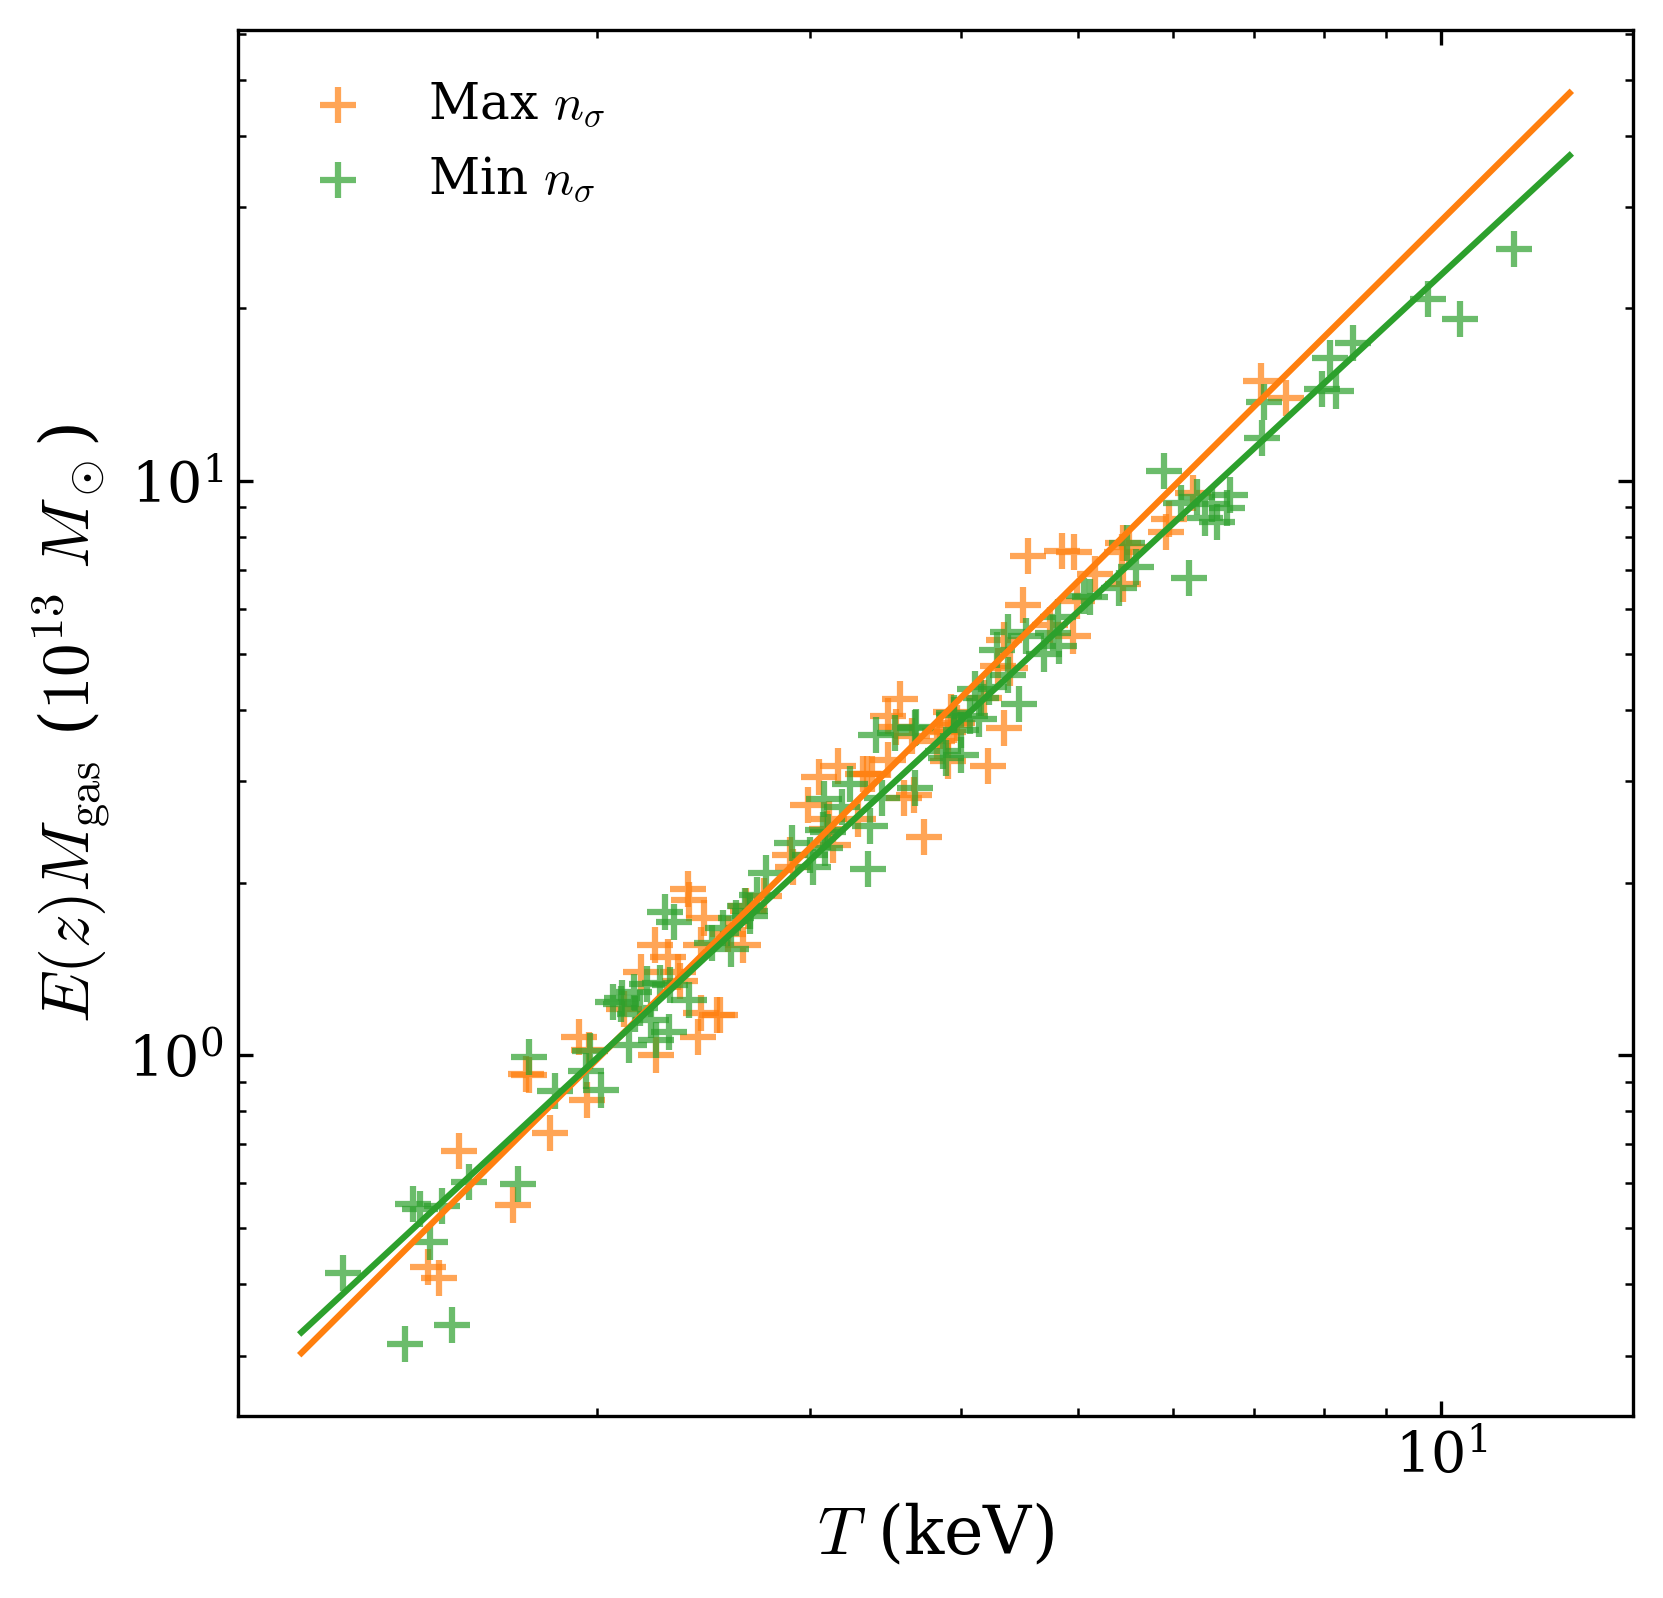

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=300)

CX = 3.6
CY = 3e13
gamma = 1

all_logX_ = np.log10(samples[cf.COLUMNS['T']][:300] / CX)
p_dipoles_logX_ = np.log10(p_dipoles[cf.COLUMNS['T']] / CX)
n_dipoles_logX_ = np.log10(n_dipoles[cf.COLUMNS['T']] / CX)
Ez = cf.E(samples['ObservedRedshift'][:300])
all_logY_ = np.log10(samples[cf.COLUMNS['M']][:300] / CY * Ez**gamma)
Ez = cf.E(p_dipoles['ObservedRedshift'])
p_dipoles_logY_ = np.log10(p_dipoles[cf.COLUMNS['M']] / CY * Ez**gamma)
Ez = cf.E(n_dipoles['ObservedRedshift'])
n_dipoles_logY_ = np.log10(n_dipoles[cf.COLUMNS['M']] / CY * Ez**gamma)

# inverse_weight = np.cos(np.deg2rad(dtheta[:300][dtheta[:300] < 75]))

plt.scatter(10**p_dipoles_logX_*CX, 10**p_dipoles_logY_*3, alpha=0.7, s=75, marker='+', label='Max $n_\\sigma$', color='tab:orange')
plt.scatter(10**n_dipoles_logX_*CX, 10**n_dipoles_logY_*3, alpha=0.7, s=75, marker='+', label='Min $n_\\sigma$', color='tab:green')

# # Ugly hack to plot clusters not in the dipoles
# pair1 = np.column_stack((all_logX_, all_logY_))
# pair2 = np.column_stack((p_dipoles_logX_, p_dipoles_logY_))
# pair3 = np.column_stack((n_dipoles_logX_, n_dipoles_logY_))
# else_mask = np.array([pair not in pair2 for pair in pair1]) * np.array([pair not in pair3 for pair in pair1])
# plt.scatter(10**all_logX_[else_mask], 10**all_logY_[else_mask], alpha=0.7, s=7, label='Others')

# plt.errorbar(10**p_dipoles_logX_, 10**p_dipoles_logY_, yerr=inverse_weight*0.09, fmt='.')

logT_ = np.linspace(-0.5, 0.55, 100)
logM_1 = np.log10(scan_bf['A'][2032]) + scan_bf['B'][2032] * logT_
plt.plot(10**logT_*CX, 10**logM_1*3, color='tab:orange')

logM_2 = np.log10(scan_bf['A'][6068]) + scan_bf['B'][6068] * logT_
plt.plot(10**logT_*CX, 10**logM_2*3, color='tab:green')

# logM_ = 0.033 + 2.756 * logT_
# plt.plot(10**logT_, 10**logM_, color='k', label='All')

plt.ylabel(f'$E(z)M_\\mathrm{{gas}}$ ($10^{{13}}$ $M_\\odot$)')
plt.xlabel(f'$T$ (keV)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

# The A and B distribution

In [23]:
scan_bt = pd.read_csv('./data/fits/scan_btstrp_M-T_θ75.csv')
p_dipole_bt = scan_bt.loc[(scan_bt['Glon'] == -92) & (scan_bt['Glat'] == 14)]
n_dipole_bt = scan_bt.loc[(scan_bt['Glon'] == 88) & (scan_bt['Glat'] == -14)]

In [24]:
all_bt = pd.read_csv('./data/fits/bootstrap_M-T.csv')

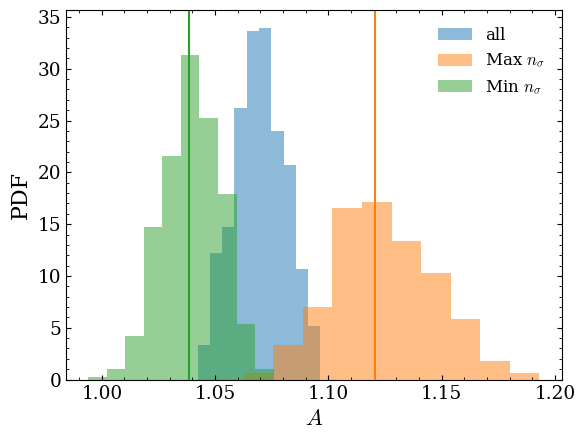

In [25]:
plt.hist(all_bt['A'], alpha=0.5, bins=10, label='all', density=True)
plt.hist(p_dipole_bt['A'], alpha=0.5, bins=10, label='Max $n_\\sigma$', density=True)
plt.hist(n_dipole_bt['A'], alpha=0.5, bins=10, label='Min $n_\\sigma$', density=True)

plt.axvline(scan_bf['A'][2032], color='tab:orange')
plt.axvline(scan_bf['A'][6068], color='tab:green')
plt.xlabel('$A$')
plt.ylabel('PDF')
plt.legend()
plt.show()

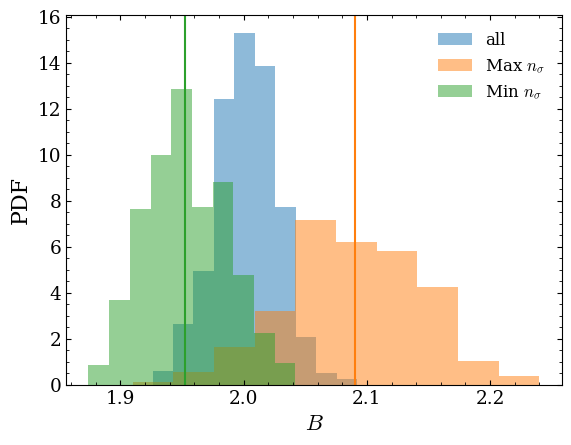

In [26]:
plt.hist(all_bt['B'], alpha=0.5, bins=10, label='all', density=True)
plt.hist(p_dipole_bt['B'], alpha=0.5, bins=10, label='Max $n_\\sigma$', density=True)
plt.hist(n_dipole_bt['B'], alpha=0.5, bins=10, label='Min $n_\\sigma$', density=True)

plt.axvline(scan_bf['B'][2032], color='tab:orange')
plt.axvline(scan_bf['B'][6068], color='tab:green')
plt.xlabel('$B$')
plt.ylabel('PDF')
plt.legend()
plt.show()